In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import os 


In [3]:
def open_infile(path):
    
    os.chdir(path)
    
    for file in os.listdir():
        if file.endswith(".csv"):
            file_name=pd.read_csv(file,sep=',')
            
    return file_name
    
    

In [4]:
file = open_infile('/Users/priyalakra/Desktop/practice')

In [5]:
file

,SNP,Risk,OR,beta,chr,pos,Alt,SE,P
0,rs10490770,C,2.133110,0.757581,3,45864732,T,0.066888,9.730000e-30
1,rs42377,A,5.629648,1.728047,7,92243672,G,0.181045,1.360000e-21
2,rs13079869,A,1.698170,0.529551,3,46008087,G,0.061180,4.900000e-18
3,rs4776235,C,1.690130,0.524805,3,46015933,T,0.061018,7.920000e-18
4,rs7642229,G,1.642070,0.495958,3,46090557,A,0.058145,1.470000e-17
...,...,...,...,...,...,...,...,...,...
95,rs913287,T,2.678520,0.985264,10,129718678,C,0.205674,1.660000e-06
96,rs1059440,C,2.733569,1.005608,11,63991801,T,0.210113,1.700000e-06
97,rs231247,C,0.801946,-0.220714,12,113359703,G,0.046168,1.750000e-06
98,rs7047997,C,2.558800,0.939538,9,5703394,T,0.196664,1.780000e-06


In [6]:
def prepare_file(file,chromosome,pval,position):
    
    # add an index column 
    file["index"] = [i for i in range(1,len(file[["chr"]])+1)]
    
    # perform p value log transformation 
    file["-log10(p)"] = -np.log10(file.P)
    
    # add new position for plotting across x-axis
    position=file[['chr','pos']]  
    new_pos = []
    add=0
    for chro,posi in position.groupby('chr'):
        new_pos.append(posi[['pos']]+add)
        add+=posi['pos'].max() # maximum position with respect to each chromosome
        
    # append new positions to the data frame    
    
    file['new_pos'] = pd.concat(new_pos)
    file_grouped = file.groupby(('chr'))
   
    return file



In [7]:
snpinfile=prepare_file(file,chromosome='chr',pval='p',position='pos')

In [8]:
snpinfile

,SNP,Risk,OR,beta,chr,pos,Alt,SE,P,index,-log10(p),new_pos
0,rs10490770,C,2.133110,0.757581,3,45864732,T,0.066888,9.730000e-30,1,29.011887,446079857
1,rs42377,A,5.629648,1.728047,7,92243672,G,0.181045,1.360000e-21,2,20.866461,937796365
2,rs13079869,A,1.698170,0.529551,3,46008087,G,0.061180,4.900000e-18,3,17.309804,446223212
3,rs4776235,C,1.690130,0.524805,3,46015933,T,0.061018,7.920000e-18,4,17.101275,446231058
4,rs7642229,G,1.642070,0.495958,3,46090557,A,0.058145,1.470000e-17,5,16.832683,446305682
...,...,...,...,...,...,...,...,...,...,...,...,...
95,rs913287,T,2.678520,0.985264,10,129718678,C,0.205674,1.660000e-06,96,5.779892,1243929363
96,rs1059440,C,2.733569,1.005608,11,63991801,T,0.210113,1.700000e-06,97,5.769551,1307921164
97,rs231247,C,0.801946,-0.220714,12,113359703,G,0.046168,1.750000e-06,98,5.756962,1482962915
98,rs7047997,C,2.558800,0.939538,9,5703394,T,0.196664,1.780000e-06,99,5.749580,1083018697


In [9]:
def manhattanplot(snpinfile):
    
    
    fig=plt.figure()
    ax = fig.add_subplot(111)
    ax_label = []
    ax_pos = []
    colors = itertools.cycle(['red','blue','green','gray','black','orange','beige','gold','coral','magenta'])


    for (chrname,detail) in list(snpinfile.groupby('chr')): 
        detail.plot(kind = 'scatter', x = "new_pos", y = "-log10(p)", color = next(colors), ax=ax);
        ax_label.append(chrname)
        ax_pos.append((detail['new_pos'].iloc[-1] + detail['new_pos'].iloc[0])/2)
    
    ax.set_xticks(ax_pos)
    ax.set_xticklabels(ax_label,rotation='vertical')
    ax.set_xlabel("Chromosomes")
    ax.set_ylabel("$-log_{10}$(p) values")
    ax.set_ylim(1,30)
    plt.axhline(y = -np.log10(1e-05), color = "magenta", linewidth = 0.5)
    plt.axhline(y = -np.log10(5e-08), color = "blue", linewidth = 0.5)

    plt.show()

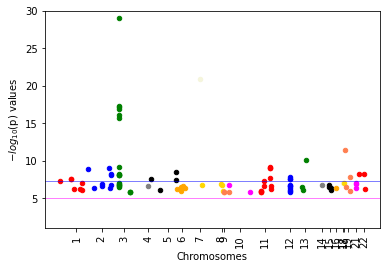

In [10]:
manhattanplot(snpinfile)